In [141]:
# imports (conda s24proj)
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# shoutout gpt for the list of stocks I was not gonna type that out
# removed visa and dow because they ipoed later than lookback period
dow = [
    "AAPL",
    "AMGN",
    "AXP",
    "BA",
    "CAT",
    "CSCO",
    "CVX",
    "DIS",
    "GS",
    "HD",
    "HON",
    "IBM",
    "INTC",
    "JNJ",
    "JPM",
    "KO",
    "MCD",
    "MMM",
    "MRK",
    "MSFT",
    "NKE",
    "PG",
    "TRV",
    "UNH",
    "VZ",
    "WBA",
    "WMT",
    "XOM",
]


# datetime for today and the year 2000, because many of these stocks hadn't ipo'ed at the max available range in yf
# end at previous trading day in case some stocks havent priced yet at the day you make the API call
end = dt.datetime.today() - dt.timedelta(days=1)
trading_month = 21
year = 365
start = dt.datetime.fromisoformat("2000-01-01")

In [143]:
# get data

# init empty dfs
daily_close = pd.DataFrame()
mktcap = pd.DataFrame()

# join close price data for ticker to close
# calculate market cap using shares outstanding today and close
# join marketcap data to mktcap
for symbol in dow:
    # get close
    curr_ticker = yf.Ticker(symbol)
    hist_price = curr_ticker.history(start=start, end=end)

    close_price = hist_price[["Close"]]
    close_price = close_price.rename(columns={"Close": symbol})

    # get shares outstanding
    n_shares = curr_ticker.info.get("sharesOutstanding")

    # multiply by close price
    cap_price = close_price * n_shares

    # concat to corresponding df
    daily_close = pd.concat([daily_close, close_price], axis=1)
    mktcap = pd.concat([mktcap, cap_price], axis=1)

In [179]:
# save data to CSV
daily_close.to_csv("Close_Data")
mktcap.to_csv("Market_Cap_Data")

In [144]:
daily_close.head()

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,0.844981,44.925053,32.854733,25.940294,12.861955,36.641254,16.968464,23.040165,63.294125,39.305946,...,26.545702,36.000637,4.620291,28.069077,17.822493,5.377777,17.185556,17.076204,14.419448,18.181019
2000-01-04 00:00:00-05:00,0.773741,41.489876,31.614201,25.899944,12.696638,34.585617,16.968464,24.389793,59.307453,37.233246,...,25.613419,34.784531,4.368276,27.528986,17.586206,5.308993,16.630030,16.440985,13.879898,17.832777
2000-01-05 00:00:00-05:00,0.785063,42.917484,30.811234,27.513641,12.994211,34.479652,17.272835,25.402016,56.530212,37.986958,...,26.619307,35.151302,4.620291,27.005251,17.451193,5.296487,17.185556,16.627817,13.596646,18.804953
2000-01-06 00:00:00-05:00,0.717125,43.631279,31.438953,27.796040,13.655497,33.907463,18.008387,24.389793,58.949089,36.178059,...,26.840107,33.973789,4.596287,28.249134,17.788742,5.490335,17.098270,16.142063,13.745017,19.777121
2000-01-07 00:00:00-05:00,0.751094,48.538696,31.896688,28.602886,14.101857,35.899517,18.325441,24.004190,59.173054,38.288422,...,29.416174,34.417755,4.596287,30.507736,18.497589,6.134420,16.972012,16.553087,14.783654,19.719072


In [145]:
monthly_close = daily_close.resample("1ME").first()
monthly_close.tail(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-30 00:00:00-04:00,194.029999,307.420013,236.880005,184.570007,331.359985,46.650002,157.460007,102.769997,454.980011,328.01001,...,127.656303,413.519989,94.400002,164.649994,209.302872,495.338623,40.98,15.92,65.82,114.449997


In [146]:
mktcap_monthly = mktcap.resample("1ME").first()

<Axes: xlabel='Date'>

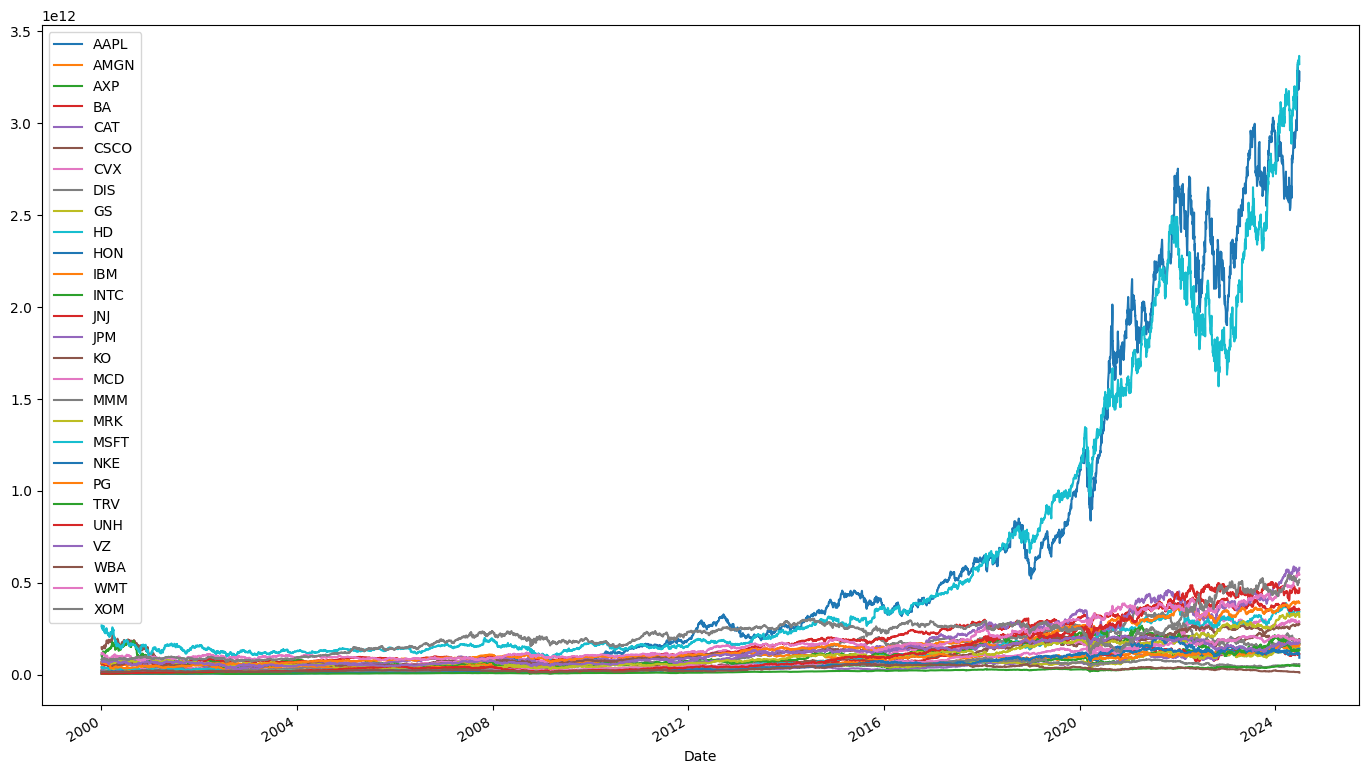

In [147]:
# plotting the absolute dominance of $AAPL and $MSFT
mktcap.plot(figsize=(17, 10))

In [148]:
# daily returns method three
next_day_returns = daily_close.pct_change().shift(-1)
next_day_returns.head(2)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,-0.084310,-0.076465,-0.037758,-0.001555,-0.012853,-0.056102,0.000000,0.058577,-0.062986,-0.052732,...,-0.035120,-0.033780,-0.054545,-0.019241,-0.013258,-0.012790,-0.032325,-0.037199,-0.037418,-0.019154
2000-01-04 00:00:00-05:00,0.014633,0.034409,-0.025399,0.062305,0.023437,-0.003064,0.017937,0.041502,-0.046828,0.020243,...,0.039272,0.010544,0.057692,-0.019025,-0.007677,-0.002356,0.033405,0.011364,-0.020407,0.054516


In [149]:
# calculate monthly returns
# switch
next_month_return = monthly_close.pct_change().shift(-1)
next_month_return.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31 00:00:00-05:00,-0.104411,0.037736,0.076322,0.088646,-0.106233,0.090225,-0.005231,0.205021,0.034681,-0.048898,...,0.135859,-0.11689,-0.029871,-0.069172,-0.111742,0.012791,0.000168,0.008753,-0.121609,0.062251


In [150]:
# 3 month returns
three_month_returns = ((monthly_close / monthly_close.shift(3)) - 1).dropna()
three_month_returns.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-04-30 00:00:00-04:00,0.190954,-0.056604,-0.009656,-0.07148,-0.133395,0.349913,0.113224,0.399581,0.196261,0.04392,...,-0.008267,-0.220376,-0.167318,-0.443375,0.03966,0.155274,0.05894,-0.108345,-0.083039,0.033695


In [151]:
# 6 month returns
six_month_returns = ((monthly_close / monthly_close.shift(6)) - 1).dropna()
six_month_returns.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-07-31 00:00:00-04:00,-0.04746,0.088381,0.002418,0.044696,-0.248914,0.196067,0.043455,0.290795,0.077873,-0.236545,...,0.140538,-0.313673,-0.145186,-0.474851,0.066988,0.639256,-0.063689,0.114257,-0.146735,0.027001


In [152]:
# 12 month returns
twelve_month_returns = ((monthly_close / monthly_close.shift(12)) - 1).dropna()
twelve_month_returns.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31 00:00:00-05:00,-0.734227,-0.000993,-0.001939,0.561577,-0.013476,-0.383459,0.060011,-0.05841,0.140943,-0.298642,...,0.399045,-0.627882,0.131722,-0.254186,0.599704,1.194206,-0.137093,0.435013,-0.189831,0.162581


In [153]:
# 11 month returns from month t-12 to month t-1
XI_window_returns = ((monthly_close / monthly_close.shift(11)) - 1).shift(-1).dropna()
XI_window_returns.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-11-30 00:00:00-05:00,-0.695142,0.029792,0.041247,0.657602,-0.133296,-0.102371,0.019152,0.004184,-0.06676,-0.400623,...,0.358167,-0.514209,-0.087736,-0.297534,0.57054,1.159303,-0.037279,0.520719,-0.231208,0.158504


In [154]:
# momentum
momentum = ((monthly_close / monthly_close.shift(10)) - 1).shift(-1).dropna()
momentum.head(1)

,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31 00:00:00-05:00,-0.633725,-0.040963,0.12042,0.652471,-0.259774,-0.03528,0.013584,0.225941,0.100398,-0.322433,...,0.345053,-0.402681,-0.167348,-0.344444,0.576349,0.975483,-0.042645,0.543631,-0.298793,0.195071


In [155]:
# function to reindex a datetime index by month and year
# useful for locating rows between dfs
def MY_index(df):
    # create a copy and reset the index
    copy = df.copy().reset_index()

    # create new columns for the month and year
    copy["month"] = copy["Date"].dt.month
    copy["year"] = copy["Date"].dt.year

    # reindex and return a new df
    copy = copy.set_index(["year", "month"]).drop("Date", axis=1)
    return copy

In [156]:
# invests some capital amount evenly in top 10 stocks based on signal
# rebalances based on frequency of the signal
# outputs a df that tracks returns of each investment


def portfolio_sim_OG(signal, return_data=next_month_return, max_per_month=10):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top ten performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)
        signal_series[:] = 0

        # invest evenly in top max signals
        signal_series[:max_per_month] = 1.0 / max_per_month

        # track the returns if you had invested 10% in the top ten each month
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

In [157]:
mpog = portfolio_sim_OG(momentum)

In [158]:
# takes in a portfolio and returns various performance metrics
class Performance:

    # init with the portfolio
    def __init__(self, portfolio, return_col="Return", return_data=next_month_return):
        self.portfolio = portfolio
        self.return_col = return_col
        self.return_data = return_data

    # plot how an initial capital amount would grow based on the portfolios returns
    def plot_index(self, capital_amt=1000):
        ((self.portfolio[self.return_col] + 1).cumprod() * capital_amt).plot(
            figsize=(17, 8)
        )

    # calculate the mean annualized returns of a portfolio
    def mean_return(self):
        # find the monthly average
        monthly_avg = self.portfolio[self.return_col].mean()

        # extend it to a year
        yearly_avg = (monthly_avg + 1) ** 12 - 1

        return yearly_avg

    # calculate the volatily and annualize it
    def vol(self):
        # multiply standard deviation of monthly returns by sqrt(12)
        vol = self.portfolio[self.return_col].std() * np.sqrt(12)

        return vol

    # sharpe ratio disregarding risk free rate
    def sharpe(self):
        # ratio of mean returns to volatility
        ratio = self.mean_return() / self.vol()

        return ratio

    # hit rate
    # the percentage of months that are winning months
    def hit(self):
        # total number of months
        total = float(len(self.portfolio))

        # number of winning months
        wins = len(self.portfolio[self.portfolio[self.return_col] > 0])

        # ration
        rate = wins / total

        return rate

    # max drawdown
    # how much capital can be lost in one drawdown
    def max_draw(self):
        # calculate series of drawdown
        drawdown = ((self.portfolio[self.return_col] + 1).cumprod()) / (
            (self.portfolio[self.return_col] + 1).cumprod().cummax()
        )

        # find max
        max = drawdown.min()

        return max

    # highest monthly gain annualized
    def high_gain(self):
        # find highest month of return
        max_month = self.portfolio[self.return_col].max()

        # annualize it
        annualized_max = (max_month + 1) ** 12 - 1

        return annualized_max

    # worst monthly loss annualized
    def worst_loss(self):
        # find worst month of loss
        min_month = self.portfolio[self.return_col].min()

        # annualize it
        annualized_min = (min_month + 1) ** 12 - 1

        return annualized_min

    # percentage of the portfolio that changes every month
    def turnover(self):
        # backtrack allocation by dividing my return data
        data = MY_index(self.return_data.copy())
        port = self.portfolio.copy()

        for i, j in port.index:
            port.loc[(i, j)] /= data.loc[(i, j)]

        # the absolute value difference in allocation
        allocation_difference = (
            np.abs(port.drop(columns=[self.return_col]).diff()).dropna().sum(axis=1)
        )
        return allocation_difference.mean()

    # print all stats
    def describe(self):
        # nothing fancy just print the methods
        print(
            f"""
Mean Return (Annualized):           {self.mean_return()}
Volatility (Annualized):            {self.vol()}
Sharpe Ratio:                       {self.sharpe()}
Hit Rate:                           {self.hit()}
Maximum Drawdown:                   {self.max_draw()}
Highest Monthly Gain (Annualized):  {self.high_gain()}
Worst Monthly Loss (Annualized):    {self.worst_loss()}
Monthly Turnover (Average):         {self.turnover()}
        """
        )


Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        


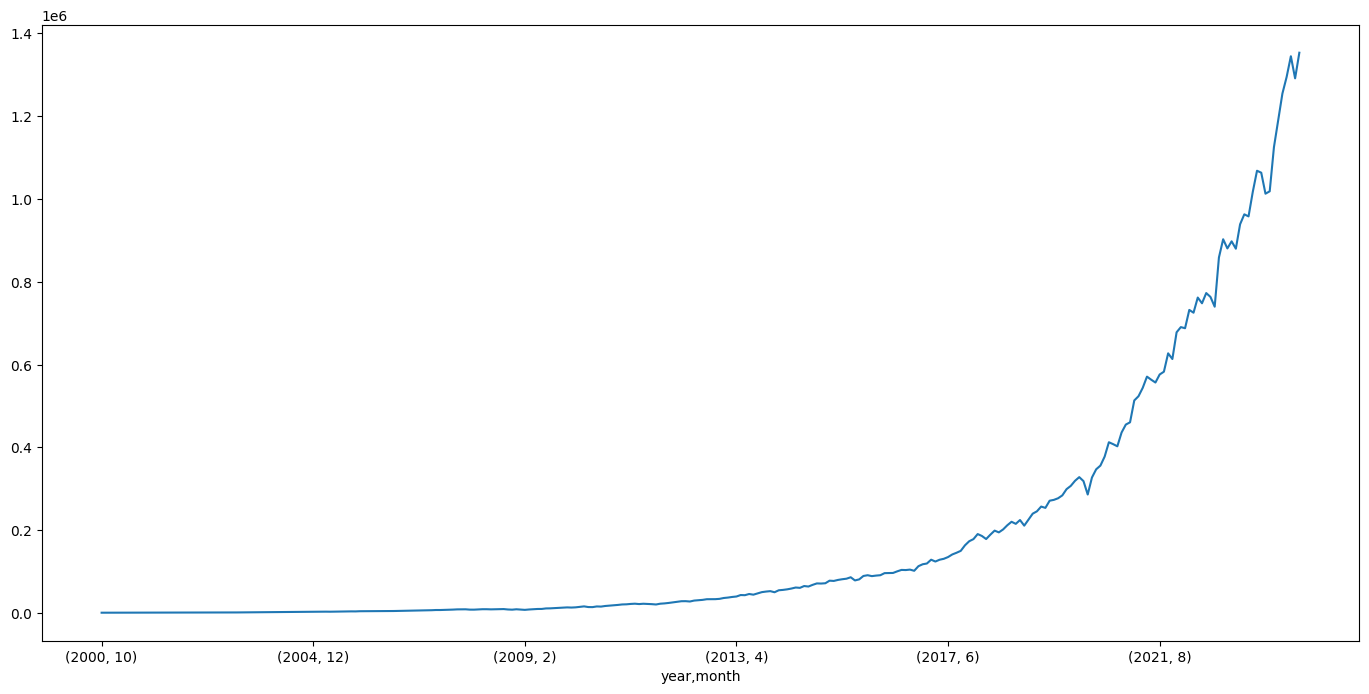

In [159]:
p1 = Performance(mpog)
p1.describe()
p1.plot_index()

In [160]:
# investing in only the top stock each month
only1 = portfolio_sim_OG(momentum, max_per_month=1)
ponly1 = Performance(only1)
ponly1.describe()

# ridiculously high retruns but low sharpe as a result of extremely high volatility


Mean Return (Annualized):           0.776313744035507
Volatility (Annualized):            0.29696766470798547
Sharpe Ratio:                       2.614135598900549
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.624769165504119
Highest Monthly Gain (Annualized):  37.766264533482165
Worst Monthly Loss (Annualized):    -0.9890506863191509
Monthly Turnover (Average):         0.7611940298507462
        


In [161]:
# portfolio that doesn't take long positiions in negative signals


def portfolio_sim_pos(signal, return_data=next_month_return, max_per_month=10):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top m performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)

        # avoids taking long position in negative signals
        positive_signals = len(signal_series[signal_series > 0])

        if positive_signals != 0 and positive_signals < max_per_month:
            # invest evenly in top positive signals
            signal_series[:positive_signals] = 1.0 / positive_signals
            signal_series[positive_signals:] = 0

        elif positive_signals == 0:
            # do not invest if all the signals are negative
            signal_series[:] = 0

        else:
            # invest evenly in top m signals
            signal_series[:max_per_month] = 1.0 / max_per_month
            signal_series[max_per_month:] = 0

        # track the returns if you had invested 10% in the top ten each month
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

In [162]:
# compares the effect of ignoring negative signals
mp2 = portfolio_sim_pos(momentum)
p2 = Performance(mp2)

# original portfolio
print("Original Portfolio:")
p1.describe()

# portfolio that avoid negative signals
print("Portfolio that disregards negative signals:")
p2.describe()

# we find that ignoring negative signals has a slight positive effect overall
# although the worst month of losses increases significantly

Original Portfolio:

Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        
Portfolio that disregards negative signals:

Mean Return (Annualized):           0.3710214137552279
Volatility (Annualized):            0.14915096274004724
Sharpe Ratio:                       2.4875562781440106
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.7929317650880922
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.824815501788732
Monthly Turnover (Average):         0.44920931058990765
        


In [163]:
# weighs investment allocation by signal strength


def portfolio_sim_rank(signal, return_data=next_month_return, max_per_month=10):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top m performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)

        # rank-weighted investment in top m stocks
        top_stocks = signal_series[:max_per_month].copy()
        signal_series[:] = 0
        signal_series[:max_per_month] = top_stocks / top_stocks.sum()

        # track the returns
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

In [164]:
# compares the original portfolio with the rank-weighted portfolio
mp3 = portfolio_sim_rank(momentum)
p3 = Performance(mp3)

# original portfolio
print("Original Portfolio:")
p1.describe()

# rank-weighted portfolio
print("Portfolio with weighted investment allocation by signal strength:")
p3.describe()

# the mean return increases significantly
# however there is a larger increase in volatily
# thus the sharpe ratio is lower

Original Portfolio:

Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        
Portfolio with weighted investment allocation by signal strength:

Mean Return (Annualized):           0.4296775982580274
Volatility (Annualized):            0.2054964715412366
Sharpe Ratio:                       2.0909244574148556
Hit Rate:                           0.7464788732394366
Maximum Drawdown:                   0.4533676466439735
Highest Monthly Gain (Annualized):  6.798549643413171
Worst Monthly Loss (Annualized):    -0.9997696437672394
Monthly Turnover (Average):         0.6691579061806339
        


In [165]:
# weighs investment allocation by market cap


def portfolio_sim_value(
    signal, return_data=next_month_return, max_per_month=10, market_cap=mktcap_monthly
):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)
    market_cap = MY_index(market_cap)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top m performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)
        mktcap_series = market_cap.loc[(i, j)]

        # value-weighted investment in top m stocks
        # mask of whether these are the stocks we are looking at
        signal_series[:max_per_month] = 1
        signal_series[max_per_month:] = 0

        # divide the target stocks by the sums of their market caps
        mktcap_series[signal_series == 1] /= mktcap_series[signal_series == 1].sum()
        mktcap_series[signal_series == 0] = 0

        # track the returns
        portfolio.loc[(i, j)] = mktcap_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

In [166]:
# compares the original portfolio with the value-weighted portfolio
mp4 = portfolio_sim_value(momentum)
p4 = Performance(mp4)

# original portfolio
print("Original Portfolio:")
p1.describe()

# value-weighted portfolio
print("Portfolio with weighted investment allocation by market cap:")
p4.describe()

# the mean return decreases significantly
# there is an increase in volatility
# and a lower hit rate
# the sharpe ratio is lower

Original Portfolio:

Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        
Portfolio with weighted investment allocation by market cap:

Mean Return (Annualized):           0.3328731862006127
Volatility (Annualized):            0.15836221895512312
Sharpe Ratio:                       2.1019734908800607
Hit Rate:                           0.7183098591549296
Maximum Drawdown:                   0.7926459098989465
Highest Monthly Gain (Annualized):  4.478365184327535
Worst Monthly Loss (Annualized):    -0.7969503815085431
Monthly Turnover (Average):         0.4867943932364978
        


In [167]:
# combined postive-only signals with rank-weighted allocation


def portfolio_sim_posrank(signal, return_data=next_month_return, max_per_month=10):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top m performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)

        # avoids taking long position in negative signals
        positive_signals = len(signal_series[signal_series > 0])

        if positive_signals != 0 and positive_signals < max_per_month:
            # rank-weighted allocation in top positive signals
            top_stocks = signal_series[:positive_signals].copy()
            signal_series[:] = 0
            signal_series[:positive_signals] = top_stocks / top_stocks.sum()

        elif positive_signals == 0:
            # do not invest if all the signals are negative
            signal_series[:] = 0

        else:
            # rank weighted investment in top m stocks
            top_stocks = signal_series[:max_per_month].copy()
            signal_series[:] = 0
            signal_series[:max_per_month] = top_stocks / top_stocks.sum()

        # track the returns if you had invested 10% in the top ten each month
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

In [168]:
# compares the original portfolio with the sign-aware rank-weighted portfolio
mp5 = portfolio_sim_posrank(momentum, max_per_month=4)
p5 = Performance(mp5)

# original portfolio
print("Original Portfolio:")
p1.describe()

# portfolio that avoids negative signals and is rank-weighted
print(
    "Portfolio with weighted investment allocation by signal strength that ignores negatiive signals:"
)
p5.describe()

# greatly increases mean return
# also increases volatility
# sharpe ratio increases, maximized at 4

Original Portfolio:

Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        
Portfolio with weighted investment allocation by signal strength that ignores negatiive signals:

Mean Return (Annualized):           0.5849512749818462
Volatility (Annualized):            0.2002753187636944
Sharpe Ratio:                       2.9207357081879493
Hit Rate:                           0.7429577464788732
Maximum Drawdown:                   0.8087413652763269
Highest Monthly Gain (Annualized):  11.632686922216651
Worst Monthly Loss (Annualized):    -0.8292632876902133
Monthly Turnover (Average):         0.616144

In [169]:
# takes long and short positions


def portfolio_sim_LS(signal, return_data=next_month_return, max_per_month=10):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # locate top ten performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)

        # invest evenly in top m signals
        signal_series[:max_per_month] = 0.5 / (max_per_month)

        # borrow equally in bottom m signals
        signal_series[-max_per_month:] = -0.5 / max_per_month
        signal_series[max_per_month:-max_per_month] = 0

        # track the returns
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio


Mean Return (Annualized):           0.21650332394672667
Volatility (Annualized):            0.07778298543663822
Sharpe Ratio:                       2.7834277989122644
Hit Rate:                           0.8169014084507042
Maximum Drawdown:                   0.8855492510933269
Highest Monthly Gain (Annualized):  1.801798716188741
Worst Monthly Loss (Annualized):    -0.7211817203938816
Monthly Turnover (Average):         0.4082089552238806
        


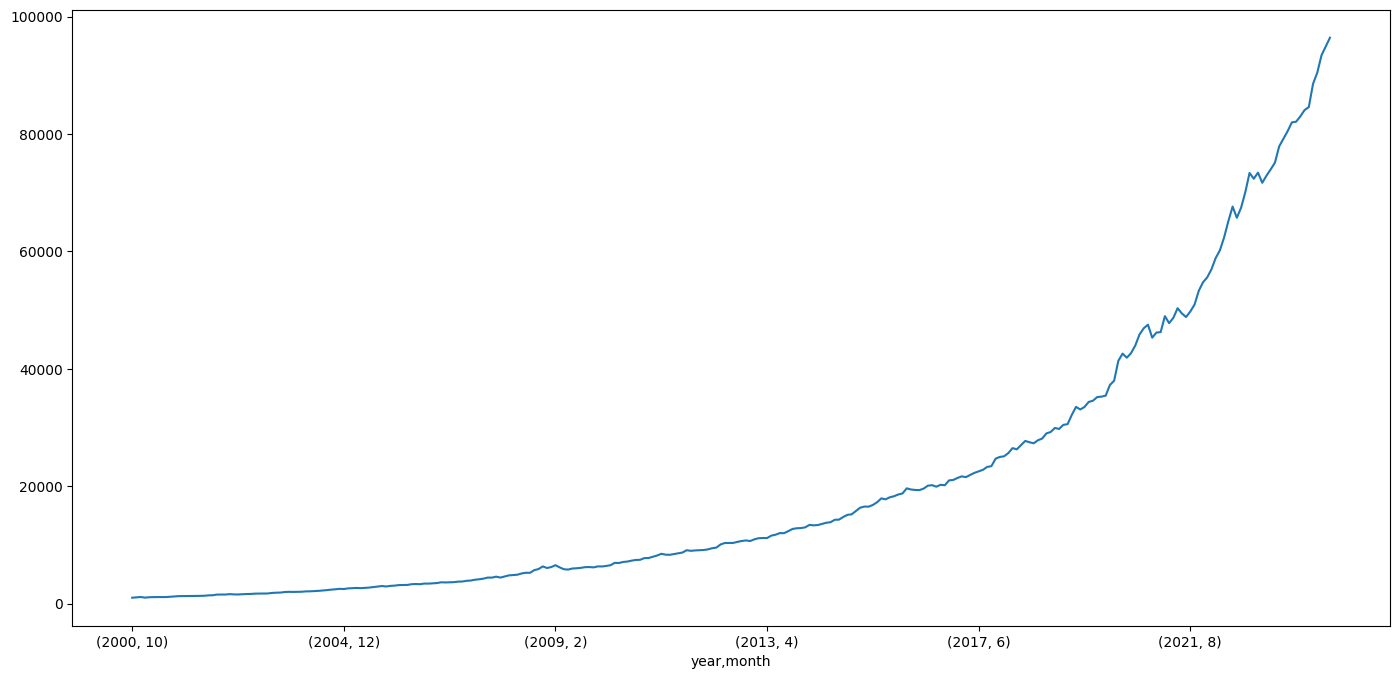

In [170]:
# performance of the LS portfolio
# over invests, might benefit from restricting the number of stocks or adjusting for the sign of the signal
mpls = portfolio_sim_LS(momentum)
pls = Performance(mpls)
pls.describe()
pls.plot_index()

In [171]:
# sharp optimized at 5 longs and shorts per month
mpls = portfolio_sim_LS(momentum, max_per_month=5)
pls = Performance(mpls)
pls.describe()
# effect most liklely because long and shorts hedge against eachother, reducing volatility


Mean Return (Annualized):           0.3201518205882923
Volatility (Annualized):            0.11039783587534796
Sharpe Ratio:                       2.8999827582651263
Hit Rate:                           0.8098591549295775
Maximum Drawdown:                   0.853405212457618
Highest Monthly Gain (Annualized):  2.9273293738463417
Worst Monthly Loss (Annualized):    -0.8507674728379139
Monthly Turnover (Average):         0.5410447761194029
        


In [172]:
# combines long and short positions, sign-aware and rank-weighted
# allows for bias towards long because markets go up in the long-term


def portfolio_sim_COMBO(
    signal, return_data=next_month_return, max_per_month=10, long_bias=1
):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    signal = MY_index(signal)

    # create a blank portfolio
    portfolio = signal.copy()
    portfolio[:] = 0

    # store value so that max can be reset

    for i, j in portfolio.index:

        max_per_month

        # locate top ten performers based on signal
        signal_series = signal.loc[(i, j)].sort_values(ascending=False)

        # number of potential long positions
        n_longs = len(signal_series[signal_series > 0])

        # cap the number of longs
        if n_longs > max_per_month:
            n_longs = max_per_month

        # top long stocks
        top_longs = signal_series[:n_longs].copy()

        # number of potential short positions
        n_shorts = len(signal_series[signal_series < 0])

        # cap the number of shorts
        if n_shorts > max_per_month:
            n_shorts = max_per_month

        # top short stocks
        top_shorts = signal_series[-n_shorts:].copy()

        # prepare
        signal_series[:] = 0
        total_weight = (long_bias * top_longs.sum()) - top_shorts.sum()

        # allocate
        signal_series[:n_longs] = (long_bias * top_longs) / total_weight
        signal_series[-n_shorts:] = top_shorts / total_weight

        # track the returns
        portfolio.loc[(i, j)] = signal_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio

Original Portfolio:

Mean Return (Annualized):           0.37067070609400643
Volatility (Annualized):            0.14945526831378708
Sharpe Ratio:                       2.4801447970088883
Hit Rate:                           0.7359154929577465
Maximum Drawdown:                   0.8075831490192008
Highest Monthly Gain (Annualized):  4.974419135538933
Worst Monthly Loss (Annualized):    -0.7231669577874247
Monthly Turnover (Average):         0.4164179104477612
        
Combined portfolio

Mean Return (Annualized):           0.6201217299832562
Volatility (Annualized):            0.1910982867414986
Sharpe Ratio:                       3.245040761784033
Hit Rate:                           0.7816901408450704
Maximum Drawdown:                   0.5954548018089446
Highest Monthly Gain (Annualized):  10.127352503669252
Worst Monthly Loss (Annualized):    -0.9452065978415668
Monthly Turnover (Average):         0.7143936273761613
        


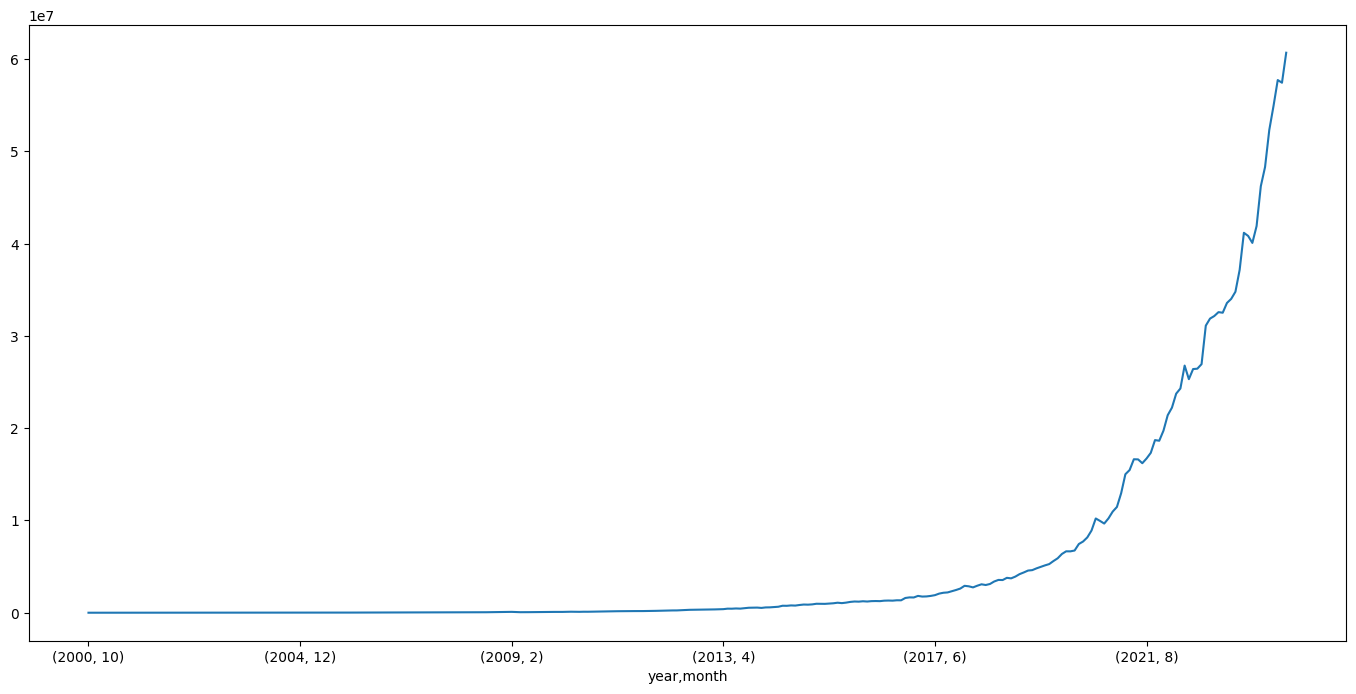

In [173]:
# compares the original portfolio with the combined portfolio
mpcombo = portfolio_sim_COMBO(momentum, max_per_month=4, long_bias=4)
pcombo = Performance(mpcombo)

# original portfolio
print("Original Portfolio:")
p1.describe()

# combo
print("Combined portfolio")
pcombo.describe()
pcombo.plot_index()

# 4 seems to be the magic number to maximize sharpe

In [174]:
# now, compare to a value-weighted investment in the entire DJIA
# weighs investment allocation by market cap


def portfolio_sim_DOW(return_data=next_month_return, market_cap=mktcap_monthly):
    # convert to Month Year index for easy lookup and loop
    return_data = MY_index(return_data)
    market_cap = MY_index(market_cap)

    # create a blank portfolio
    portfolio = return_data.copy()
    portfolio[:] = 0

    for i, j in portfolio.index:

        # weigh investment by market cap
        # invest in all tickers
        mkt_series = market_cap.loc[(i, j)] / market_cap.loc[(i, j)].sum()

        # track the returns
        portfolio.loc[(i, j)] = mkt_series * return_data.loc[(i, j)]

    # track the total return for each month
    portfolio["Return"] = portfolio.sum(axis=1)

    return portfolio


Mean Return (Annualized):           0.10418982064096327
Volatility (Annualized):            0.15788373228602737
Sharpe Ratio:                       0.6599148571697657
Hit Rate:                           0.6224489795918368
Maximum Drawdown:                   0.5940810219033089
Highest Monthly Gain (Annualized):  4.1186532094059585
Worst Monthly Loss (Annualized):    -0.8934605324310194
Monthly Turnover (Average):         0.043681120423358054
        


<bound method Performance.plot_index of <__main__.Performance object at 0x126c7bf10>>

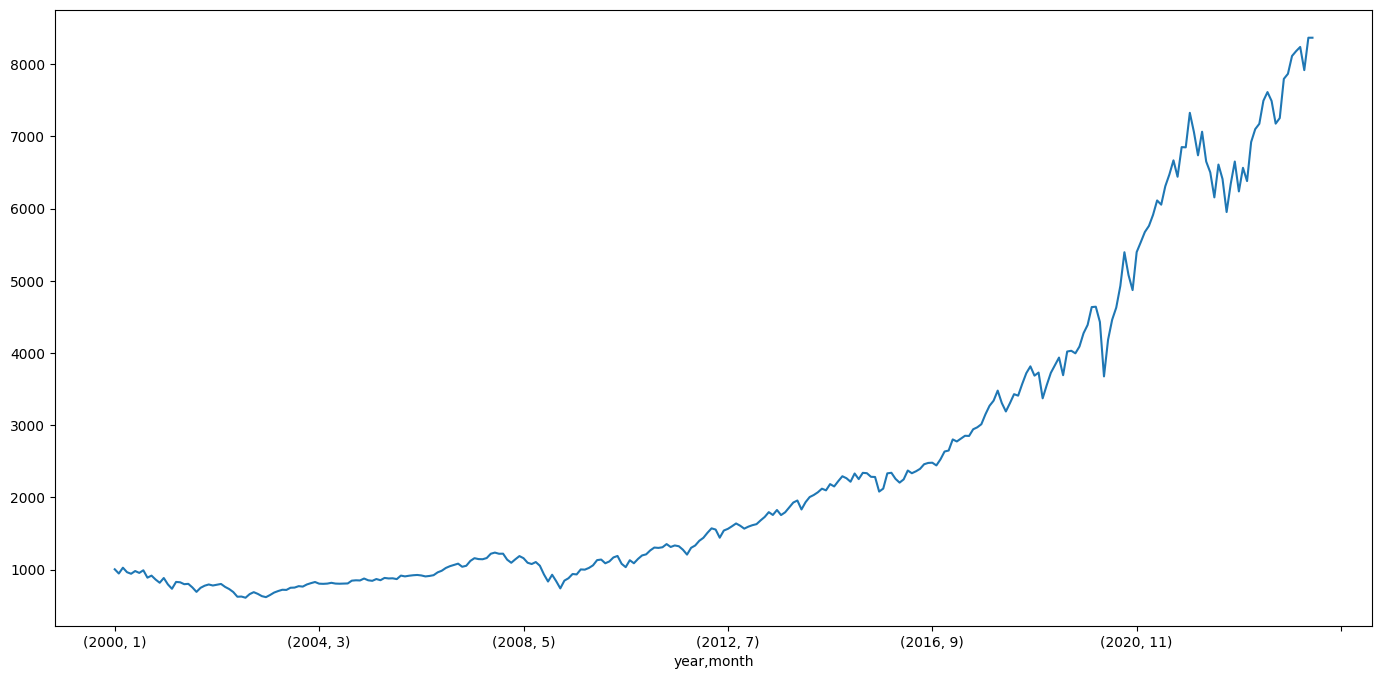

In [175]:
dowp = portfolio_sim_DOW()
pdow = Performance(dowp)
pdow.describe()
pdow.plot_index()
pcombo.plot_index

In [176]:
# plot the divergence of the portfolio from a benchmark
def plot_alpha(portfolio, return_col="Return", benchmark_portfolio=dowp):
    alpha = portfolio[return_col].cumsum() - benchmark_portfolio[return_col].cumsum()
    print(alpha.iloc[-1])
    alpha.plot(figsize=(17, 8))

nan


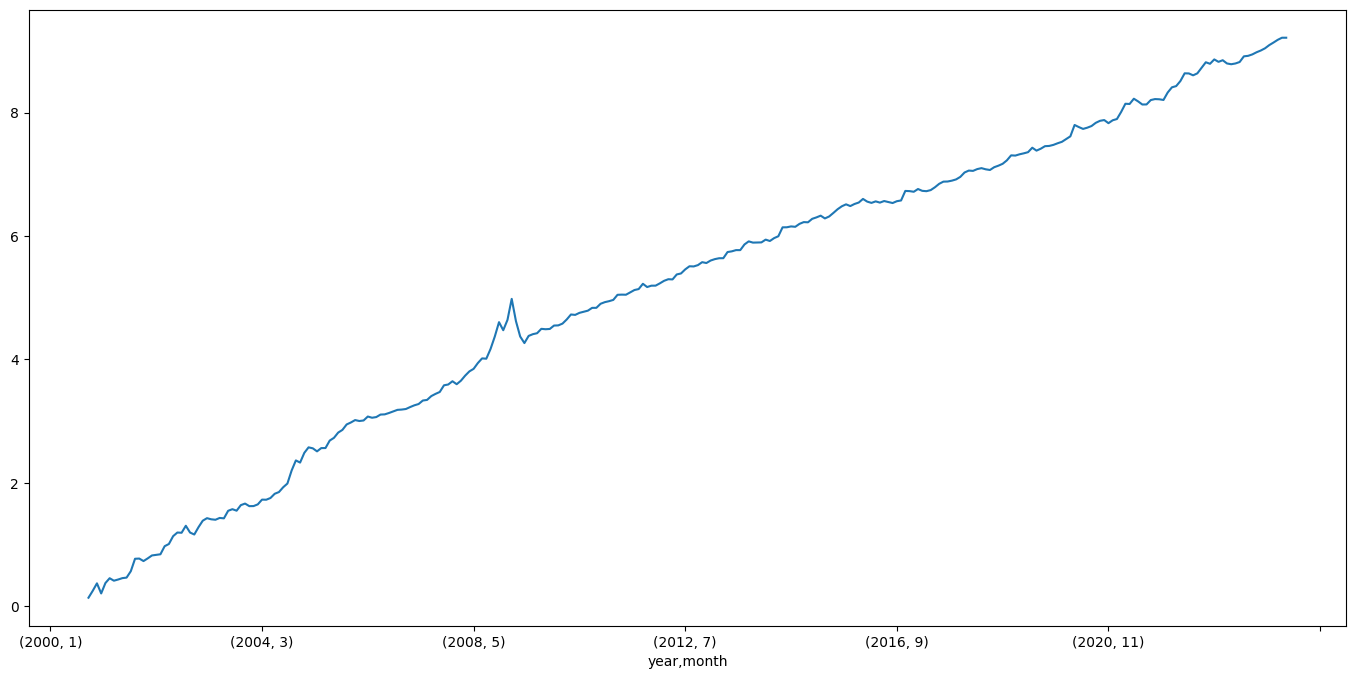

In [177]:
plot_alpha(mpcombo)